In [1]:
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

Após selecionar uma estação climática:
1. Abrir os limites climáticos (utilizando o mesmo cronograma de by_stations)
2. Para cada mes, estimar a duração do projeto e verificar a data real
3. Realizar visualizações

# libs

In [2]:
import pandas as pd 
import datetime
import numpy as np  
import time
import itertools
import random
import os
import pickle
import sys
import time
from itertools import product
from copy import deepcopy
from joblib import Parallel, delayed
import pickle
import plotly.express as px
import plotly.offline as py

sys.path.append('../..')



In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np  
import time
import os
import pickle
import sys
import time
from itertools import product
from numpy import nan

sys.path.append('../..')
from src.model.true import check_duration
from experiments.real.config import *
from tqdm import tqdm
tasks = list(project_schedule.keys())

from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from tqdm import tqdm
import datetime
import os
import sys
import time
sys.path.append('../..')
from src.model.weather_pert import WeatherPert
from src.model.two_steps.model import KNN, WeatherGenerator
from src.validation.validation import *
from experiments.real.config import * 
import pickle
from experiments.real.config import * 
from tqdm import tqdm

# Variaveis globais

In [28]:
src_id = str(908 )

data_dir = os.path.join('..', '..', 'data','cleaned')
src_dir = os.path.join('..', '..', 'data', 'real', 'results_4years', src_id)
results_dir = os.path.join('..', '..', 'data', 'real', 'by_task')

if not os.path.exists(results_dir): os.mkdir(results_dir)

In [29]:
loss_type = ''
with open(os.path.join(src_dir, 'weather_pert_hpt_best.pickle'), 'rb') as file:
    weather_pert_hpt_best = pickle.load(file)['right-tail']
weather_pert_hpt_best

{'alpha': 1.0, 'smoothing': 3, 'mc': False, 'cossine': False}

In [30]:
B = 20_000

In [31]:
data = pd.read_csv(os.path.join(data_dir, f"{src_id}.csv")).fillna(nan).replace([None], [nan])

# 1. Abrir os limites climáticos

In [32]:
model = WeatherPert(**weather_pert_hpt_best, column_date='date')
model.fit(tasks_conditions=tasks_conditions, data=data[data['date'] < '2019-01-01'])

In [35]:
x = list(range(1, 60)) + [59.5] + list(range(60, 366))
thetas = model.theta
task_rename = {
    'earthworks': 'Earthworks',
    'concrete': 'Concrete',
    'formworks': 'Formworks',
    'steelworks': 'Steelworks',
    'outdoor': 'Outdoor paintings',
    'pavements': 'Pavements'
}
fig = (
    pd.DataFrame([
        [x[i], task_rename[task.replace('_1', '')], t]
        for j, (task, theta) in enumerate(thetas.items())
            if j < len(thetas)/2
        for i, t in enumerate(theta)
        ], columns = ['Day of the year', 'Task', 'theta']
    ).pipe(lambda df: (
        px.line(
            df, x='Day of the year', y='theta', color='Task',
            template="simple_white", # color_discrete_sequence=colors,
            #facet_col='fi', facet_col_wrap=2
            )
    )))
fig.update_layout(
    yaxis_range=[0,1],
    width=800, height=600,
    yaxis_title=r'Execution probability',
    xaxis_title=r'Day of the year'
    )
fig.write_image("exp_date_start_thetas.pdf")

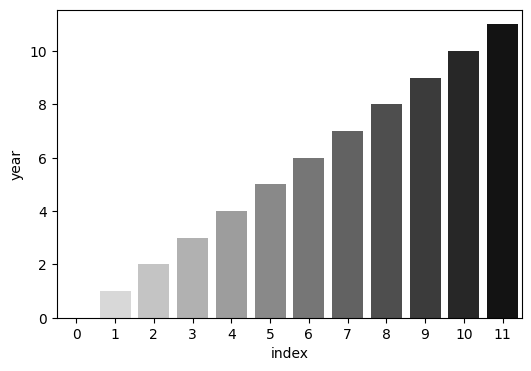

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Rectangle

df=pd.DataFrame(data=[i for i in range(12)],columns=['year'])
table=df['year'].reset_index()
fig, ax1 = plt.subplots(figsize=(6,4))
sns.barplot(x='index', y='year', data=table, ax=ax1, palette='gist_gray_r')

bars = [r for r in ax1.get_children() if type(r)==Rectangle]
gray_colors = [c.get_facecolor() for c in bars[:-1]]
gray_colors = [f"rgb({c[0]},{c[1]},{c[2]})" for c in gray_colors]
#gray_colors.sort()

In [37]:
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

In [38]:
colors = {
    'Janeiro': '#FFE59A',
    'Fevereiro': '#F1C231',
    'Março': '#BF9002',
    'Abril': '#E06666',
    'Maio': '#CC0100',
    'Junho': '#660000',
    'Julho': '#A4C2F4',
    'Agosto': '#3C78D8',
    'Setembro': '#1C4586',
    'Outubro': '#93C47D',
    'Novembro': '#38761D',
    'Dezembro': '#284E13',
}

In [39]:
def task_cost(estimate_duration, planned_duration):
    return (estimate_duration - planned_duration)**2
project_cost = {
 'earthworks_1': task_cost,
 'concrete_1': task_cost,
 'steelworks_1': task_cost,
 'formworks_1': task_cost,
 'pavements_1': task_cost,
 'outdoor_1': task_cost,
 'earthworks_2': task_cost,
 'concrete_2': task_cost,
 'steelworks_2': task_cost,
 'formworks_2': task_cost,
 'pavements_2': task_cost,
 'outdoor_2': task_cost
 }

In [41]:
month_name_english = {
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Março': 'March',
    'Abril': 'April',
    'Maio': 'May',
    'Junho': 'June',
    'Julho': 'July',
    'Agosto': 'August',
    'Setembro': 'September',
    'Outubro': 'October',
    'Novembro': 'November',
    'Dezembro': 'December',
}

In [44]:
year = '2019'
months = list(range(1, 13))

point_no_sig = 'rgb(96,96,96)'
point_sig = 'rgb(0,0,0)'
identity = 'red'

names = [
    'Janeiro',  'Fevereiro',  'Março',  'Abril', 
    'Maio',  'Junho',  'Julho',  'Agosto', 
    'Setembro',  'Outubro', 'Novembro', 'Dezembro'
    ]

fig = make_subplots(rows=2, cols=1, row_heights=[0.8, 0.2], shared_xaxes=True)
result = pd.DataFrame()
for month in months:
    i = month - 1
    month_name = names[i]
    color = colors[month_name]
    date = f"{year}-{str(month).zfill(2)}-01"
    estimate = model.predict(date_start=date, project_schedule=project_schedule)
    observed = check_duration(
        data=data, date_start=date, project_schedule=project_schedule,
        tasks_conditions=tasks_conditions)
    result = pd.concat([result, pd.DataFrame([{
        'month': month,
        'mean': round(np.mean(estimate), 1), 'std': round(np.std(estimate), 1),
        'q5': int(np.quantile(estimate, .05)),
        'q25': int(np.quantile(estimate, .25)),
        'q50': int(np.quantile(estimate, .50)),
        'q75': int(np.quantile(estimate, .75)),
        'q95': int(np.quantile(estimate, .95)),
        }])])
    fig_ = go.Box(
        x=[observed], 
        marker_symbol='line-ns-open', 
        marker_color='rgba(255,255,255,0)',
        boxpoints='all',
        jitter=0,
        fillcolor=color,#gray_colors[i],
        line_color=color,#gray_colors[i],
        #hoveron='points',
        name='Observado'
        )
    fig_.update(showlegend=False)
    fig.add_trace(fig_, row=2, col=1)

    counter = Counter(estimate)
    n = sum(counter.values())
    x = list(range(min(counter.keys()), max(counter.keys())+1))
    y = [counter[x_i]/n for x_i in x]

    dist_plot = ff.create_distplot(
        [estimate],
        group_labels = [month_name_english[month_name]], 
        show_hist=False)
    #fig.add_trace(go.Scatter(
    #    dist_plot['data'][0],
    #    line=dict(color=gray_colors[i], width=2)
    #    ), row=1, col=1)
    
    # interpolando valores
    # Valores inteiros de x que queremos interpolar
    x_density = dist_plot['data'][0].x
    y_density = dist_plot['data'][0].y
    x_int = np.arange(np.ceil(x_density[0]), np.floor(x_density[-1]) + 1)

    # Interpolação linear para encontrar os valores de y correspondentes aos valores inteiros de x
    y_int = np.interp(x_int, x_density, y_density)



    #counter = Counter(estimate)
    #n = sum(counter.values())
    #x = list(range(min(counter.keys()), max(counter.keys())+1))
    #y = [counter[x_i]/n for x_i in x]
#
    fig.add_trace(go.Scatter(
        x=x_int, y=y_int,
        mode='lines+markers',
        line=dict(width=1, color=color),#gray_colors[i]),
        marker=dict(size=3, color=color),#gray_colors[i])
        name=month_name_english[month_name]
        ), row=1, col=1)
    

fig.update_layout(
    # xaxis_title='Tempo de execução (dias)',
    # yaxis_title='$Z$',
    template = "simple_white",
    width=800, height=600,
    legend_title_text='Month'
    )
fig.update_xaxes(title_text='Execution time (days)', row=2, col=1)
fig.update_yaxes(title_text='Probability', row=1, col=1)
fig.write_image('exp_date_start_dist.pdf')

In [45]:
print(result.to_markdown(index=False))

|   month |   mean |   std |   q5 |   q25 |   q50 |   q75 |   q95 |
|--------:|-------:|------:|-----:|------:|------:|------:|------:|
|       1 |  276.7 |  15.4 |  254 |   266 |   276 |   286 |   305 |
|       2 |  262.6 |  18.9 |  236 |   250 |   259 |   273 |   298 |
|       3 |  257.5 |  21.4 |  226 |   241 |   257 |   272 |   290 |
|       4 |  270.1 |  23.7 |  237 |   253 |   266 |   285 |   313 |
|       5 |  294.9 |  23   |  258 |   279 |   294 |   311 |   333 |
|       6 |  310.8 |  15.5 |  285 |   301 |   311 |   322 |   334 |
|       7 |  318   |  14.4 |  292 |   308 |   318 |   329 |   340 |
|       8 |  315.3 |  11   |  297 |   308 |   315 |   322 |   333 |
|       9 |  311.6 |  13.2 |  292 |   302 |   311 |   320 |   334 |
|      10 |  309.4 |  13.5 |  288 |   300 |   309 |   319 |   331 |
|      11 |  303.5 |  15.2 |  279 |   294 |   303 |   314 |   330 |
|      12 |  294   |  14.5 |  271 |   284 |   293 |   302 |   319 |


In [22]:
year = '2019'
months = list(range(1, 13))

point_no_sig = 'rgb(96,96,96)'
point_sig = 'rgb(0,0,0)'
identity = 'red'

names = [
    'Janeiro',  'Fevereiro',  'Março',  'Abril', 
    'Maio',  'Junho',  'Julho',  'Agosto', 
    'Setembro',  'Outubro', 'Novembro', 'Dezembro'
    ]

fig = go.Figure()

for month in months:
    i = month - 1
    month_name = names[i]
    color = colors[month_name]
    date = f"{year}-{str(month).zfill(2)}-01"
    cost = model.predict(date_start=date, project_schedule=project_schedule, project_cost=project_cost)['costs']
    dist_plot = ff.create_distplot(
        [cost],
        group_labels = [month_name], 
        show_hist=False)
    # interpolando valores
    # Valores inteiros de x que queremos interpolar
    x_density = dist_plot['data'][0].x
    y_density = dist_plot['data'][0].y
    fig.add_trace(go.Scatter(
        x=x_density, y=y_density,
        mode='lines',
        line=dict(width=1, color=color),#gray_colors[i]),
        marker=dict(size=3, color=color),#gray_colors[i])
        name=month_name
        ), row=1, col=1)
    

fig.update_layout(
    template = "simple_white",
    width=800, height=600
    )
fig.update_xaxes(title_text='Tempo de execução (dias)')
fig.update_yaxes(title_text='Custo')
fig.write_image('exp_date_start_cost_dist.pdf')

In [27]:

for i, month in enumerate(range(1, 13)):
    month = str(month).zfill(2)
    fig_ = go.Box(
        x=[observed[month]], 
        marker_symbol='line-ns-open', 
        marker_color='rgba(255,255,255,0)',
        boxpoints='all',
        jitter=0,
        fillcolor=gray_colors[i],
        line_color=gray_colors[i],
        #hoveron='points',
        name='Observado'
        )
    fig_.update(showlegend=False)
    fig.add_trace(fig_, row=2, col=1)
    dist_plot = ff.create_distplot(
        [estimate[month]],
        group_labels = [names[i]], 
        show_hist=False)
    fig.add_trace(go.Scatter(
        dist_plot['data'][0],
        line=dict(color=gray_colors[i], width=2)
        ), row=1, col=1)
fig.update_layout(
    # xaxis_title='Tempo de execução (dias)',
    # yaxis_title='$Z$',
    template = "simple_white",
    width=800, height=600
    )
fig.update_xaxes(title_text='Tempo de execução (dias)', row=2, col=1)
fig.update_yaxes(title_text='$Z$', row=1, col=1)
plot_url = py.plot(fig, filename='latex', include_mathjax='cdn')

TypeError: 'int' object is not subscriptable